<a href="https://colab.research.google.com/github/shirolesandeep/myrubyprograms/blob/master/Casting_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1. Install Dependencies and Setup

In [2]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 668.3 MB 16 kB/s 
     |████████████████████████████████| 462 kB 7.0 MB/s 
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220527125636
    Uninstalling tensorflow-2.8.2+zzzcolab20220527125636:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220527125636
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 60 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.

In [3]:
from zipfile import ZipFile
file_name = "data.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')






done


In [4]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 511.7 MB 6.4 kB/s 
     |████████████████████████████████| 438 kB 68.0 MB/s 
     |████████████████████████████████| 511.7 MB 4.4 kB/s 
     |████████████████████████████████| 497.9 MB 18 kB/s 


In [5]:
!pip list

Package                       Version
----------------------------- ------------------------------
absl-py                       1.1.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.2.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.4.0
audioread                     2.1.9
autograd                      1.4
Babel                         2.10.2
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.0
blis                          0.7.7
bokeh                         2.3.3
branca                        0.5.0
bs4                           0.0.1
CacheControl                  0.

In [6]:
import tensorflow as tf
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [7]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [8]:
#2. Remove dodgy images

In [9]:
import cv2
import imghdr
import os

In [10]:
data_dir = 'data' 

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [13]:
#3. Load Data

In [14]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 6633 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

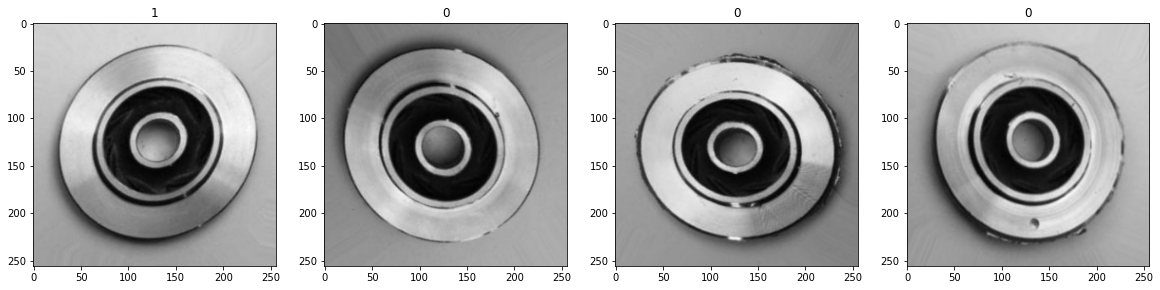

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
#4. Scale Data

In [20]:
data = data.map(lambda x,y: (x/255, y))

In [21]:
data.as_numpy_iterator().next()

(array([[[[0.68201596, 0.68201596, 0.68201596],
          [0.68201596, 0.68201596, 0.68201596],
          [0.68201596, 0.68201596, 0.68201596],
          ...,
          [0.65882355, 0.65882355, 0.65882355],
          [0.65882355, 0.65882355, 0.65882355],
          [0.65882355, 0.65882355, 0.65882355]],
 
         [[0.6774203 , 0.6774203 , 0.6774203 ],
          [0.6774203 , 0.6774203 , 0.6774203 ],
          [0.6774203 , 0.6774203 , 0.6774203 ],
          ...,
          [0.65882355, 0.65882355, 0.65882355],
          [0.65882355, 0.65882355, 0.65882355],
          [0.65882355, 0.65882355, 0.65882355]],
 
         [[0.6745098 , 0.6745098 , 0.6745098 ],
          [0.6745098 , 0.6745098 , 0.6745098 ],
          [0.6745098 , 0.6745098 , 0.6745098 ],
          ...,
          [0.65882355, 0.65882355, 0.65882355],
          [0.65882355, 0.65882355, 0.65882355],
          [0.65882355, 0.65882355, 0.65882355]],
 
         ...,
 
         [[0.5561887 , 0.5561887 , 0.5561887 ],
          [0.54699

In [22]:
#5. Split Data

In [23]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [24]:
train_size

145

In [25]:

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [26]:
#6. Build Deep Learning Model

In [27]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [33]:
#7. Train

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libcudnn8 is already the newest version (8.1.0.77-1+cuda11.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 60 not upgraded.


In [37]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
145/145 [==============================] - 24s 128ms/step - loss: 0.5406 - accuracy: 0.7166 - val_loss: 0.4350 - val_accuracy: 0.7774
Epoch 2/20
145/145 [==============================] - 16s 107ms/step - loss: 0.2989 - accuracy: 0.8642 - val_loss: 0.2213 - val_accuracy: 0.9093
Epoch 3/20
145/145 [==============================] - 16s 106ms/step - loss: 0.1409 - accuracy: 0.9530 - val_loss: 0.1118 - val_accuracy: 0.9573
Epoch 4/20
145/145 [==============================] - 19s 126ms/step - loss: 0.1083 - accuracy: 0.9638 - val_loss: 0.0905 - val_accuracy: 0.9680
Epoch 5/20
145/145 [==============================] - 17s 114ms/step - loss: 0.0751 - accuracy: 0.9769 - val_loss: 0.0737 - val_accuracy: 0.9733
Epoch 6/20
145/145 [==============================] - 16s 107ms/step - loss: 0.0765 - accuracy: 0.9744 - val_loss: 0.0716 - val_accuracy: 0.9726
Epoch 7/20
145/145 [==============================] - 19s 128ms/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0338 - val_ac

In [38]:
#8. Plot Performance

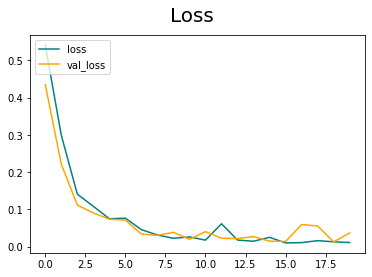

In [39]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

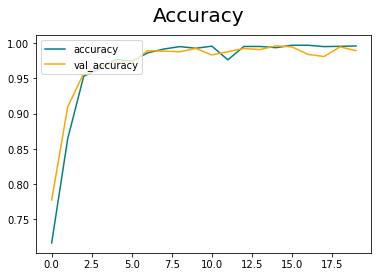

In [40]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
#9. Evaluate

In [42]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [43]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [44]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [45]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.98545456, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.99375, shape=(), dtype=float32)


In [46]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9854545593261719, Recall:1.0, Accuracy:0.9937499761581421


In [47]:
#10. Test

In [48]:
import cv2
import imghdr

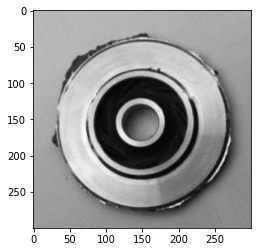

In [49]:
img = cv2.imread("/content/cast_def_0_136.jpeg")
plt.imshow(img)
plt.show()

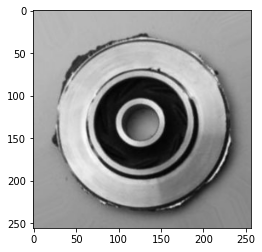

In [50]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [51]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [52]:
yhat

array([[1.7752122e-10]], dtype=float32)

In [53]:
if yhat > 0.5: 
    print(f'Casting class accepted ok')
else:
    print(f'Casting class Rejected')

Casting class Rejected


In [54]:
#11. Save the Model

In [55]:
from tensorflow.keras.models import load_model

In [56]:
model.save(os.path.join('models','castingmodel.h5'))

In [57]:
new_model = load_model(os.path.join('models','castingmodel.h5'))

In [58]:
new_model.predict(np.expand_dims(resize/255, 0))

array([[1.7752122e-10]], dtype=float32)

In [59]:
yhat1 = new_model.predict(np.expand_dims(resize/255, 0))

In [60]:
if yhat1 > 0.5: 
    print(f'Casting class accepted ok')
else:
    print(f'Casting class Rejected')

Casting class Rejected


# New Section